<a href="https://colab.research.google.com/github/Vivek9411/Machine_learning_With_PyTorch/blob/main/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in PyTorch
* `torchvision` - base domian library for pytorch computer vision
* `torchcvision.datsets` - get datasets and daata loading function for computer vision
* `torchvision.models` - get pretrained computer vision and models that you can leverage for your own problems

* `torchvision.trandforms` - function for manupulating your vision data(images) to be suitable for use with an ML model

* `torch.utils.data.Dataset` - Base dataset class for PyTorch

* `torch.utils.data.DataLoader` - Creates a Python over a dataset

In [ ]:
# Import torch
import torch
import torch.nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


# import matplotlib for visualization
import matplotlib.pyplot as plt




## 1.  Getting a dataset
The dataset we'll  be using is FashionMNIST.

In [ ]:
# setup traning data
train_data  = datasets.FashionMNIST(
    root = 'data', # where to download the data to?
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train=False,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform = None
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.0MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 263kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.95MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
images, label = train_data[0]
images, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#check the shape of our image

print(f"Image shape: {images.shape}-> [color_channels, heigth, width]")
print(f"Image label : {class_names[label]}")

Image shape: torch.Size([1, 28, 28])-> [color_channels, heigth, width]
Image label : Ankle boot


1.1 Visualizing  of data

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

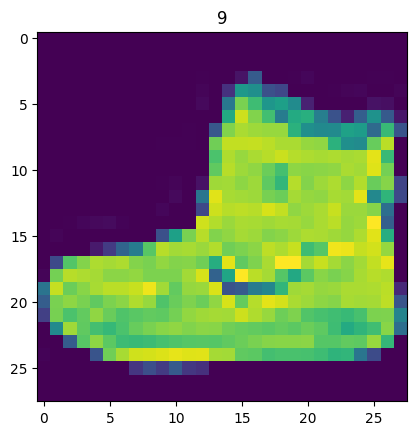

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.permute(1,2,0))
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

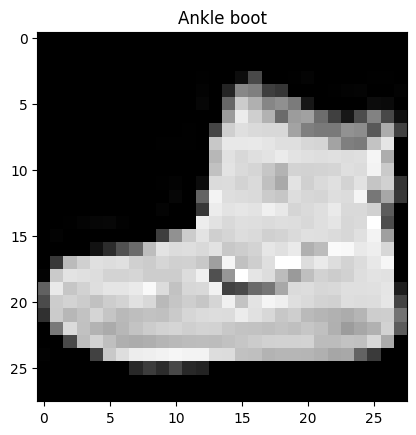

In [ ]:
plt.imshow(image.permute(1,2,0), cmap = 'grey')
plt.title(class_names[label])

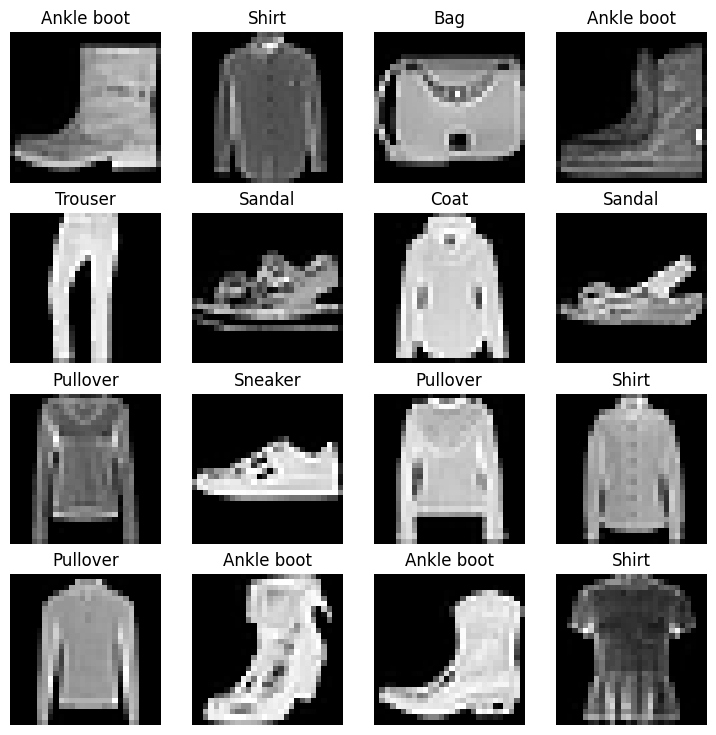

In [ ]:
# plot mare images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx  = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    image, label= train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.permute(1,2,0), cmap='grey')
    plt.title(class_names[label])
    plt.axis(False)


Do you think these items of clothes(images) coluld be model;ed with pure linear lines

## 2. Preparing the DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns oour datasets into a Python iterables.

More specifically , we want to turn our data into batches (or mini- batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look ( store in memory) at 60000 images in on hit. So we break it soen to 32 images at at tiem (batch size of 32).

2. It gives our neural network more chances to update its gradinets per epoch.

In [ ]:
from torch.utils.data import DataLoader

# sertup the batch size hyperparameter

BATCH_SIZE = 32

# Turn Datasets into iterables (batches)

train_dataloader = DataLoader(dataset=train_data,
                              batch_size =  BATCH_SIZE,
                              shuffle=True, pin_memory=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x789a51ab0b10>,
 <torch.utils.data.dataloader.DataLoader at 0x789a4f696990>)

In [ ]:
train_feature_batch,train_labels_batch  = next(iter(train_dataloader))

train_feature_batch.shape, train_labels_batch

(torch.Size([32, 1, 28, 28]),
 tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
         9, 7, 8, 8, 3, 3, 7, 2]))

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 3. Model 0 : Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a  baseline model.


A baseline model is a simple model you will try and improve upon with subsequet models/experimients.

In other words: start simply and add complexity when necessary.

In [ ]:
from torch import nn

In [ ]:
# Create a flattern laye
flatter_model = nn.Flatten()

x = train_feature_batch[0]


# Flattern the sample

output = flatter_model(x)

x.shape, output.shape



(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__ (self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
torch.manual_seed(42)

# setup the  model
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28], device=device
                     )
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
flatter_model(dummy_x).shape

torch.Size([1, 784])

### 3.1 set up loss , optimizer, evaluation metrics
* Loss function - `nn.CrossEntropyLoss()`
* optimizer - `SGD()`
* acurray_function - write manually

In [ ]:
def accuracy_fn(y_pred, y_act):
    acc = torch.eq(y_pred, y_act).sum().item()
    return acc*100/len(y_act)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr= 0.1)

# creating a function to time our experiments

Machine learning is very expeimental

Two of the main things you'll often want to track
1. Model's Performace (loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import  default_timer as timer

def print_train_time(start:float, end:float, device = None):
    total_time = end-start
    print(f"Train time on {device}: {total_time: .3f} seconds")
    return total_time


## 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing stepsl, calculate the test loss *per batch*
4. Print out what's happening
5. time it all (for dum)

In [ ]:
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# set up epoches
epoches = 3

# create training and test loop
for epoch in tqdm(range(epoches)):
    print(f"Epoch: {epoch}\n----------------------")
    # training
    train_loss = 0

    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X= X.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        model_0.train()

        # step 1 forward pass
        y_pred = model_0(X)

        #2 calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        #3 optimizer
        optimizer.zero_grad()

        #4 backpropogation
        loss.backward()

        #5 optimizer step()
        optimizer.step()

        #  print out what's happening
        if batch%400==0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader)}")

    # divide total train lss by length of train dataloader
    train_loss /= len(train_dataloader)


    ### testing
    model_0.eval()
    test_loss , test_acc = 0,0
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test = X_test.to(device, non_blocking=True)
            y_test = y_test.to(device, non_blocking=True)
            test_preds = model_0(X_test)
            test_loss += loss_fn(test_preds, y_test)

            test_acc += accuracy_fn(y_pred=test_preds.argmax(dim=1), y_act=y_test)

            # test_pred_probab = torch.sigmoid(test_preds)
            # test_pred_labels = torch.argmax(test_pred_probab)
        # calcuate the test loss
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    # print out whats happening
    print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

#calculate  training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device =str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------------
Looked at 0/1875
Looked at 12800/1875
Looked at 25600/1875
Looked at 38400/1875
Looked at 51200/1875

 Train loss: 0.5904 | Test loss: 0.5095 | test acc: 82.0387
Epoch: 1
----------------------
Looked at 0/1875
Looked at 12800/1875
Looked at 25600/1875
Looked at 38400/1875
Looked at 51200/1875

 Train loss: 0.4763 | Test loss: 0.4799 | test acc: 83.1969
Epoch: 2
----------------------
Looked at 0/1875
Looked at 12800/1875
Looked at 25600/1875
Looked at 38400/1875
Looked at 51200/1875

 Train loss: 0.4550 | Test loss: 0.4766 | test acc: 83.4265
Train time on cpu:  32.900 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make Predictiions and get Model 0 results


In [ ]:
torch.manual_seed(42)
def eval_model( model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn ):
    """ Returns a dictionary containing the results of model prediction on data_loader """
    loss, acc = torch.tensor(.0, device=device),0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X = X.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            batch_pred_logits = model(X)
            loss += loss_fn(batch_pred_logits, y)
            acc += accuracy_fn(batch_pred_logits.argmax(dim=1), y)
        loss =loss/len(test_dataloader)
        acc = acc/len(test_dataloader)

    return {"model_name": model.__class__.__name__, # only works when model was created with class
            "model_loss": loss.item(),
            'model_accuracy': acc,
            }

model_0_results = eval_model(model= model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

In [ ]:
# set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
model_0= model_0.to(device)

In [ ]:
28*28

784

## .0 making new model to improve predcttions

In [ ]:
# creating a newner model having non linearity

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784,out_features=hidden_units ),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_units)
        )

    def forward(self, x):
        return self.layer_stack(x)



In [ ]:
model_1 = FashionMNISTModelV1(input_units=784, hidden_units=16, output_units=len(class_names)).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

##.1 set up loss function, optimizer and accuracy

In [ ]:
# loss fn
loss_fn = nn.CrossEntropyLoss()

# optimiser
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

# accuracy fn
def accuracy_fn(y_pred, y_act):
    return (torch.eq(y_pred, y_act).sum().item()*100)/len(y_act)


## .2 functionizing training and testing loop

Les's create a function for:
* training loop - `train_step()`
* test loop - `test_step()`

In [ ]:
def  train_step(model:torch.nn.Module,
                data_loader:torch.utils.data.DataLoader,
                loss_fn :torch.nn.Module,
                optimizer :torch.optim.Optimizer ,
                accuracy_fn,
                device = 'cpu'
                ):
    """ Performs a training with model trying to learn on data_loader """
    # step1
    model.train()
    train_loss, acc = torch.tensor(.0,device=device),0
    # step1.1 for dataloader (special)
    for batch_number, (X,y) in enumerate(data_loader):
        X= X.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        # forward pass
        y_pred_logits  = model(X)

        # calculate the loss
        loss = loss_fn(y_pred_logits, y)

        acc += accuracy_fn(y_pred_logits.argmax(dim=1), y)
        train_loss += loss

        # optimize zero grad
        optimizer.zero_grad()

        # backpropogation loss.backwards
        loss.backward()

        # optimizer step
        optimizer.step()
    train_loss /= len(data_loader)
    acc /= len(data_loader)

    print('train loss: ', loss.item(), ' | train accuracy: ', acc)



In [ ]:
def test_step( model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = 'cpu'):
    """ Returns a dictionary containing the results of model prediction on data_loader """
    test_loss, acc = torch.tensor(.0, device=device),0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X = X.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)

            # forward pass

            batch_pred_logits = model(X)

            # calculate the loss and accuracy
            loss = loss_fn(batch_pred_logits, y)

            test_loss += loss
            acc += accuracy_fn(batch_pred_logits.argmax(dim=1), y)

        test_loss /= len(test_dataloader)
        acc /= len(test_dataloader)
        print(f"test_loss: {loss.item():.5f} | test_accuracy: {acc:.2f}%\n")

In [ ]:
# Optimization loop
torch.manual_seed(42)
from timeit import default_timer as Timer
train_time_start_gpu = timer()

epoches = 3
for epoch in tqdm(range(epoches)):
    print(f"epoch {epoch}----------------\n")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device= device)

    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_gpu = timer()

print_train_time(train_time_start_gpu, train_time_end_gpu, 'gpu')



  0%|          | 0/3 [00:00<?, ?it/s]

epoch 0----------------

train loss:  0.3703154921531677  | train accuracy:  75.77833333333334


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.29018 | test_accuracy: 82.38%

epoch 1----------------

train loss:  0.3775497376918793  | train accuracy:  83.50333333333333


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.24163 | test_accuracy: 83.68%

epoch 2----------------

train loss:  0.5962353348731995  | train accuracy:  84.81666666666666


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.20113 | test_accuracy: 82.97%

Train time on gpu:  32.961 seconds


32.96113997900002

In [ ]:
eval_model(model=model_1, data_loader = test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.48653316497802734,
 'model_accuracy': 82.96725239616613}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known CoveNets

CNN's are known for their capabilities to find patterns in visual data.

In [ ]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels= hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1,),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding =1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            )

        self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride= 1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size = 3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )


        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
            in_features = hidden_units*49,
            out_features = output_shape,
            )
        )

    def forward(self, x):
        x = self.conv_block_1(x)

        # print(x.shape)

        x = self.conv_block_2(x)

        # print(x.shape)

        x = self.classifier(x)
        return x

In [ ]:
# model_3 = FashionMNISTModelV2(input_shape==1, hidden_units=10, output_shape=len(class_names))

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, hidden_units = 10, output_shape = len(class_names)).to(device)

In [ ]:
### 7.1 stepping through nn.conv2d()
image.shape

torch.Size([1, 28, 28])

In [ ]:
# model_2(image.unsqueeze(dim=0))

In [ ]:
# setting up loss and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)


In [ ]:
epoches = 3
for epoch in tqdm(range(epoches)):
    print(f"epoch:{epoch}----------------")

    train_step(model = model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
    test_step(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0----------------
train loss:  0.5624425411224365  | train accuracy:  62.321666666666665


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.43003 | test_accuracy: 77.10%

epoch:1----------------
train loss:  0.40944725275039673  | train accuracy:  79.99


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.22189 | test_accuracy: 79.80%

epoch:2----------------
train loss:  0.5010970234870911  | train accuracy:  83.67166666666667


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.21936 | test_accuracy: 83.86%



In [ ]:
epoches = 3
for epoch in tqdm(range(epoches)):
    print(f"epoch:{epoch}----------------")

    train_step(model = model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
    test_step(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0----------------
train loss:  0.39141368865966797  | train accuracy:  85.09833333333333


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.23778 | test_accuracy: 85.76%

epoch:1----------------
train loss:  0.29955431818962097  | train accuracy:  86.16


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.27436 | test_accuracy: 86.15%

epoch:2----------------
train loss:  0.6499778628349304  | train accuracy:  86.835


  0%|          | 0/313 [00:00<?, ?it/s]

test_loss: 0.27139 | test_accuracy: 85.87%



## 10. Making a confusion matrix for firther prediction evaluation
1. Make predictions with our trained model on the test data
2. Make a confusion  mateix `torchmatrics.ConfusionMatrix()`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
from tqdm.auto import tqdm

#1.Make predictions with trained model
y_preds = []

model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions ...'):
        # send the data and targets to target deviice
        X, y = X.to(device), y.to(device)

        # do the forward _pass
        y_pred_logits = model_2(X)

        y_pred_labels = y_pred_logits.argmax(dim = 1)
        y_preds.append(y_pred_labels.cpu())

# concatinate the list of predixtions into  tensor
print(y_preds)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions ...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 0, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 6, 6,
        1, 6, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 6, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        2, 2, 9, 7, 6, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 4, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
y_pred_tensor[:34]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 0, 9, 4, 8, 8, 3, 3])

In [ ]:
# see if required packages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f"mlxtesd version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split('.')[1])>=19 , 'mlxtend cersion should be 0.19.0 or higher'
except:
    ! pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.2 MB/s eta 0:00:00


In [ ]:
mlxtend.__version__

'0.23.4'

In [ ]:
torchmetrics.__version__

'1.6.1'

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task= 'multiclass',num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor, target=test_data.targets)


In [ ]:
confmat_tensor

tensor([[723,   1,  11,  35,   8,   1, 217,   0,   4,   0],
        [  2, 967,   3,  18,   4,   1,   4,   0,   1,   0],
        [ 12,   0, 698,   7, 160,   0, 119,   0,   4,   0],
        [ 13,  21,   6, 840,  45,   0,  73,   0,   2,   0],
        [  1,   1,  51,  19, 829,   0,  98,   0,   1,   0],
        [  0,   0,   0,   0,   0, 952,   1,  35,   1,  11],
        [ 79,   2,  54,  24, 102,   0, 726,   0,  13,   0],
        [  0,   0,   0,   0,   0,  14,   0, 969,   0,  17],
        [  3,   1,   6,   8,   4,   2,  20,   5, 951,   0],
        [  0,   0,   0,   0,   0,   9,   4,  56,   0, 931]])

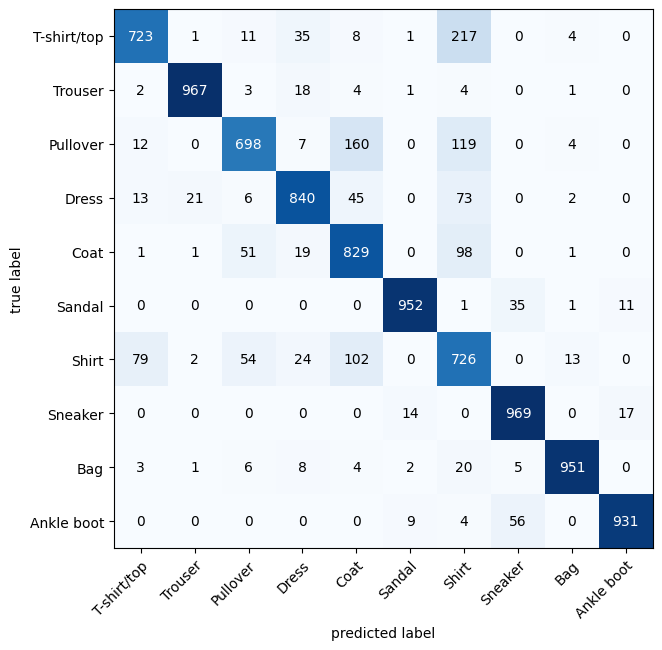

In [ ]:
#. plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize = (10,7))


In [ ]:
from pathlib import Path
# Create a model directory path

Model_path = Path('models')
Model_path.mkdir(parents=True, exist_ok=True)
Model_name = 'famnist_fastio_model.pth'

torch.save(obj = model_2.state_dict(), f=Model_path/Model_name)
